In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import cv2
import torch
import pickle
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import ParameterGrid

In [2]:
if 0:
    import glob
    import joblib
    import os
    from PIL import Image
    import imagehash
    from tqdm.auto import tqdm

    paths = glob.glob('../input/petfinder-adoption-prediction/*/*jpg')

    result = joblib.Parallel(n_jobs=-1, verbose=1)(joblib.delayed(lambda x: imagehash.average_hash(Image.open(x)))(path) for path in paths)


    tmp = pd.DataFrame()
    tmp['path'] = paths
    tmp['hash'] = result
    tmp['hash'] = tmp['hash'].astype(str)

    tmp['is_train'] = tmp['path'].str.find('train') > -1
    tmp['is_test'] = tmp['path'].str.find('test') > -1
    tmp['idx'] = tmp['path'].map(lambda x: int(x.split('-')[-1][:-4]))
    tmp['PetID'] = tmp['path'].map(lambda x: x.split('/')[-1].split('-')[0])
    
    df1_train = pd.read_csv('../input/petfinder-adoption-prediction/train/train.csv')
    df1_test = pd.read_csv('../input/petfinder-adoption-prediction/test/test.csv')

    df1_train = pd.merge(tmp, df1_train, how='left', on='PetID')

    df1['is_train'] = df1['is_train'].astype(np.float32)
    df1['is_test'] = df1['is_train'].astype(np.float32)
    df1['hash'] = df1['hash'].astype(str)
    #df1 = df1[(df1['is_train'] > 0 ) | (~df1['hash'].isin(df1.loc[df1['is_train'] > 0, 'hash']))].reset_index(drop=True)
    df1.to_csv('df1_train_test.csv', index=False)

In [3]:
import os
from PIL import Image
import imagehash
from tqdm.auto import tqdm
if 0:
    df1 = pd.read_csv('../input/petfinder-adoption-prediction/train/train.csv')
    df1['path'] = '../input/petfinder-adoption-prediction/train_images/' + df1['PetID'] + '-1.jpg'
    df1 = df1[df1['path'].map(os.path.exists)]

    df2 = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
    df2['path'] = df2['Id'].map(lambda x:str(f'../input/petfinder-pawpularity-score/train/{x}.jpg'))

    df1['hash'] = [imagehash.average_hash(Image.open(x))
                        for x in tqdm(df1['path'].values)]
    df2['hash'] = [imagehash.average_hash(Image.open(x))
                        for x in tqdm(df2['path'].values)]
    #train_df_prev['hash'] = [imagehash.average_hash(Image.open(x))
    #                    for x in tqdm(train_df_prev['path'].values)]

    df1.to_csv('df1.csv', index=False)
    df2.to_csv('df2.csv', index=False)
else:
    #df1 = pd.read_csv('../input/pet-data/df1_train_test_all.csv')
    df1 = pd.read_feather('../input/pet-data/df1_train_test_all_2ndplace.ftr')
    
    df2 = pd.read_csv('../input/pet-data/df2.csv')

In [4]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,72766,72767,72768,72769,72770,72771,72772,72773,72774,72775
PetID,d336e6953,77544cbd4,0149d04e7,cad25c91b,9c7476c25,e01f077a7,449290a8b,6c9382d17,ebdf19959,6a864757b,...,af7305535,f51767bbe,c46f3bb03,ef20ce351,8a69b8ca9,819610fb0,280dd2698,4b393cb28,b88cb23c9,311368756
AdoptionSpeed,1.0,1.0,2.0,3.0,1.0,4.0,3.0,2.0,4.0,3.0,...,4.0,1.0,3.0,2.0,2.0,1.0,1.0,4.0,4.0,4.0
hash,193f20c0c86c2f2f,0f0f0f3fffffe000,387fef070743071f,0c00003f27e7ffff,ffb301d9f0e08e04,1f1f40602c1e9f9f,ffc7c3c7c3c3d3a7,fff860000083feff,18981c371fff0707,f0fcece060302040,...,0078784cecfdffff,78787c1c18797b38,0261f03cbaf1e87c,0f0f79f1f0f8f8b8,00000c1d9f8fffff,00003e3f3f1f0000,00001c1e6e7f767c,3070380cfbffffff,f000faffe7c3c111,78cf3c0d08e0e0fd
Type,1,2,1,1,1,1,2,2,1,1,...,1,2,1,1,2,2,2,1,1,2
Age,2,15,2,3,3,238,1,3,24,3,...,48,2,2,1,2,48,6,24,17,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SVD_CHAR_meta_annots_top_desc_11,-0.003903,-0.042673,-0.038885,-0.048127,-0.025764,0.017086,0.014638,0.012727,0.036759,-0.115849,...,-0.031293,0.011651,0.007454,0.040289,0.025216,-0.007198,-0.044744,0.006908,-0.06651,-0.077215
SVD_CHAR_meta_annots_top_desc_12,-0.067196,-0.060873,0.065448,0.086088,-0.050687,0.01463,-0.005064,-0.024166,0.004556,0.086817,...,0.014241,-0.012251,-0.081894,-0.073364,0.008879,-0.004997,0.016997,-0.065695,-0.072488,-0.03921
SVD_CHAR_meta_annots_top_desc_13,-0.031962,0.019737,-0.0093,0.004944,-0.035552,0.084592,0.001673,-0.046372,-0.048723,-0.049596,...,0.06496,-0.051277,0.280089,0.142421,0.036637,-0.025574,-0.031443,0.11537,0.01201,-0.049272
SVD_CHAR_meta_annots_top_desc_14,-0.011629,-0.094677,-0.075205,-0.091519,0.03061,-0.018642,-0.00108,-0.071657,-0.01401,-0.03531,...,-0.053066,-0.025982,-0.022263,-0.041477,0.005162,-0.083177,-0.00116,0.048815,0.087014,-0.029412


In [5]:
df1.shape, df1.hash.nunique(), df2.hash.isin(df1.hash).sum()

((72776, 639), 70437, 1942)

In [6]:
#df1.to_csv('train_last_comp.csv', index=False)
df = pd.merge(df2, df1, how='left', on='hash')

In [7]:
df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,...,SVD_CHAR_meta_annots_top_desc_6,SVD_CHAR_meta_annots_top_desc_7,SVD_CHAR_meta_annots_top_desc_8,SVD_CHAR_meta_annots_top_desc_9,SVD_CHAR_meta_annots_top_desc_10,SVD_CHAR_meta_annots_top_desc_11,SVD_CHAR_meta_annots_top_desc_12,SVD_CHAR_meta_annots_top_desc_13,SVD_CHAR_meta_annots_top_desc_14,SVD_CHAR_meta_annots_top_desc_15
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,...,0.025664,0.024442,0.047741,0.027576,0.063731,-0.011582,-0.024845,0.034323,-0.009676,0.034839
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,...,0.003139,0.129696,-0.081333,-0.075261,0.114023,-0.059271,-0.103345,0.118016,-0.042908,0.036295
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,...,-0.123100,0.045249,0.005224,-0.084068,-0.138723,0.046765,-0.087916,-0.049454,0.027309,0.010546
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10013,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10014,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10015,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10016,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,...,-0.026046,-0.124322,-0.088857,-0.020309,0.007704,-0.020093,-0.010808,-0.022741,0.013844,0.015995


In [8]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,10008,10009,10010,10011,10012,10013,10014,10015,10016,10017
Id,0007de18844b0dbbb5e1f607da0606e0,0009c66b9439883ba2750fb825e1d7db,0013fd999caf9a3efe1352ca1b0d937e,0018df346ac9c1d8413cfcc888ca8246,001dc955e10590d3ca4673f034feeef2,001dd4f6fafb890610b1635f967ea081,0023b8a3abc93c712edd6120867deb53,0031d6a9ef7340f898c3e05f92c7bb04,0042bc5bada6d1cf8951f8f9f0d399fa,0049cb81313c94fa007286e9039af910,...,ff78a56d5e0029cd6288c62f7b7f10e5,ff903858a9899465ee4cd17e942bef24,ff9b3b3468c4b35a3b6450a1ddc88449,ffaf7bf7e64b9eecaf02fc2c14d6b654,ffb8b466494a3e48bcb874a2fe9b976d,ffbfa0383c34dc513c95560d6e1fdb57,ffcc8532d76436fc79e50eb2e5238e45,ffdf2e8673a1da6fb80342fa3b119a20,fff19e2ce11718548fa1c5d039a5192a,fff8e47c766799c9e12f3cb3d66ad228
Subject Focus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Eyes,1,1,1,1,0,0,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Face,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Near,1,0,1,1,1,0,1,0,1,1,...,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SVD_CHAR_meta_annots_top_desc_11,-0.011582,-0.059271,0.046765,NaN,NaN,NaN,NaN,NaN,NaN,-0.026132,...,0.062218,-0.062913,NaN,NaN,NaN,NaN,NaN,NaN,-0.020093,NaN
SVD_CHAR_meta_annots_top_desc_12,-0.024845,-0.103345,-0.087916,NaN,NaN,NaN,NaN,NaN,NaN,-0.030275,...,0.023536,0.17564,NaN,NaN,NaN,NaN,NaN,NaN,-0.010808,NaN
SVD_CHAR_meta_annots_top_desc_13,0.034323,0.118016,-0.049454,NaN,NaN,NaN,NaN,NaN,NaN,-0.047991,...,-0.054769,-0.052404,NaN,NaN,NaN,NaN,NaN,NaN,-0.022741,NaN
SVD_CHAR_meta_annots_top_desc_14,-0.009676,-0.042908,0.027309,NaN,NaN,NaN,NaN,NaN,NaN,-0.026859,...,-0.006737,-0.147045,NaN,NaN,NaN,NaN,NaN,NaN,0.013844,NaN


In [9]:
df2.columns

Index(['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur', 'Pawpularity',
       'path', 'hash'],
      dtype='object')

In [10]:
df.columns

Index(['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
       'Group', 'Collage', 'Human',
       ...
       'SVD_CHAR_meta_annots_top_desc_6', 'SVD_CHAR_meta_annots_top_desc_7',
       'SVD_CHAR_meta_annots_top_desc_8', 'SVD_CHAR_meta_annots_top_desc_9',
       'SVD_CHAR_meta_annots_top_desc_10', 'SVD_CHAR_meta_annots_top_desc_11',
       'SVD_CHAR_meta_annots_top_desc_12', 'SVD_CHAR_meta_annots_top_desc_13',
       'SVD_CHAR_meta_annots_top_desc_14', 'SVD_CHAR_meta_annots_top_desc_15'],
      dtype='object', length=654)

In [11]:
#df = pd.read_csv('../exps/exp1_swin_large_patch4_window12_384/train_cv_score.csv')
#df = pd.read_csv('ens_exp15.csv')

[0.5178882  0.16358161 0.32366979]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


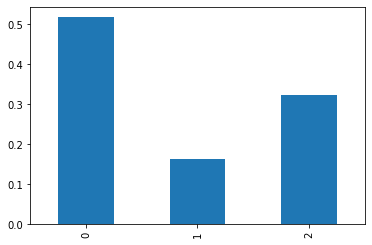

In [12]:
train = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')['Id'].map(lambda x:str(f'../input/petfinder-pawpularity-score/train/{x}.jpg'))
oof = pd.concat([train,
                 pd.read_csv('../input/petfinder-ensumble/exp085_ensumble/exp085_ensumble_oof.csv')['oof']], 
                 axis=1).set_index('Id')['oof']/100
oof2 = pd.concat([train,
                 pd.read_csv('../input/exp108/exp108_oof.csv')['pred']], 
                 axis=1).set_index('Id')['pred']/100


#df['pred4'] = df['path_x'].map(pd.read_csv('../input/pet-data/ens_exp15.csv', index_col='path')['pred'])
df['pred1'] = df['path'].map(pd.read_csv('../input/pet-data/ens_exp4-7-8-9-15.csv', index_col='path')['pred'])
df['pred2'] = df['path'].map(oof)
df['pred3'] = df['path'].map(oof2)

coef = np.linalg.lstsq(df[['pred1', 'pred2', 'pred3']], df['Pawpularity'] / 100)[0]
print(coef)
pd.Series(coef).plot(kind='bar')

df['pred'] = np.dot(df[['pred1', 'pred2', 'pred3']], coef)

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

df['fold'] = -1


N_FOLDS = 5
strat_kfold = StratifiedKFold(n_splits=5, random_state=365, shuffle=True)
for i, (_, train_index) in enumerate(strat_kfold.split(df.index, df['Pawpularity'])):
    df.loc[train_index, 'fold'] = i

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [14]:
COL_FEATURES = ['Blur', 
                #'Face', 
                #'Occlusion',
                'Eyes',
                #'Accessory',
               #'Group',
                #'Human',
                #'Near',
                #'Collage',
                #'Info',# 
                #'Action',
                
                'pred',
                #'pred1', 'pred2', 'pred3', 'pred4',
                
                #'len_desc', 'len_name', 
                #'len_word_desc', 'len_word_name',
                #'isin'
                #'breed_label', 'breed_prob',
                #'img_h', 'img_w',
                #'det_label', 'det_left', 'det_top', 'det_right', 'det_bottom', 'det_prob'
               ] + df1.drop(['Name', 'RescuerID', 'Description', 'PetID', 'path', 'hash',
                             'Type', 'VideoAmt', 'Sterilized', 'MaturitySize', 'Health', 'Dewormed',
                             'idx'
                            ], axis=1, errors='ignore').columns.tolist()

COL_FEATURES =  ['pred',
 'dense_SVD_18',
 'Blur',
 'dense121_128',
 'SVD_meta_annots_top_desc_15',
 'AdoptionSpeed',
 'Eyes',
 'SVD_CHAR_Name_5',
 'SVD_CHAR_Name_0',
 'SVD_Description_3',
 'resnet50_SVD_6',
 'resnet_128',
 'dense_128',
 'dense_SVD_15',
 'resnet50_SVD_23',
 'SVD_CHAR_BreedName_full_10',
 'dense121_SVD_19',
 'RESCUER_PhotoAmt_STD',
 'dense121_SVD_31',
 'SVD_meta_annots_top_desc_27',
 'SVD_meta_annots_top_desc_30',
 'resnet34_SVD_14',
 'dense121_SVD_7',
 'SVD_Description_42',
 'meta_label_score_max_MAX',
 'dense121_SVD_8',
 'SVD_meta_annots_top_desc_13',
 'meta_color_green_mean_MEAN',
 'resnet50_SVD_28',
 'resnet34_SVD_16',
 'dense_SVD_24',
 'res34_64',
 'resnet50_SVD_30',
 'SVD_CHAR_meta_annots_top_desc_14',
 'meta_color_red_mean_STD',
 'Affectionate with Family',
 'SVD_meta_desc_4',
 'meta_label_score_max_STD',
 'meta_label_score_mean_MAX',
 'SVD_meta_annots_top_desc_19',
 'SVD_Description_24',
 'SVD_meta_desc_12',
 'resnet34_SVD_25',
 'meta_label_score_min_MAX',
 'SVD_CHAR_Name_9',
 'SVD_Description_67',
 'SVD_CHAR_Name_14',
 'RESCUER_PetID_NUNIQUE',
 'SVD_Description_21',
 'resnet50_SVD_27',
 'dense121_SVD_17',
 'resnet34_SVD_24',
 'SVD_CHAR_meta_annots_top_desc_12',
 'SVD_meta_annots_top_desc_9',
 'resnet34_SVD_8',
 'SVD_Description_56',
 'resnet50_SVD_10',
 'resnet50_SVD_12',
 'SVD_Description_63',
 'SVD_Description_37',
 'SVD_meta_annots_top_desc_24',
 'resnet50_SVD_29',
 'meta_label_score_min_STD',
 'SVD_CHAR_meta_annots_top_desc_6',
 'meta_color_pixelfrac_MEAN',
 'SVD_Description_9',
 'SVD_meta_annots_top_desc_26',
 'resnet50_SVD_25',
 'SVD_meta_annots_top_desc_29',
 'SVD_CHAR_Name_4',
 'SVD_Description_52',
 'RESCUER_Vaccinated_MEAN',
 'SVD_Description_73',
 'dense_SVD_9',
 'meta_color_pixelfrac_STD',
 'dense_SVD_7',
 'dense_SVD_31',
 'dense_SVD_17',
 'resnet50_SVD_2',
 'SVD_Description_78',
 'SVD_Description_0',
 'SVD_Description_51',
 'SVD_Description_22',
 'RESCUER_Sterilized_MEAN',
 'resnet34_SVD_19',
 'resnet34_SVD_22',
 'img_CLUSTER_0',
 'resnet34_SVD_28',
 'dense_SVD_14',
 'PhotoAmt',
 'SVD_CHAR_meta_annots_top_desc_4',
 'SVD_CHAR_Name_15',
 'SVD_CHAR_Name_8',
 'SVD_CHAR_meta_annots_top_desc_13',
 'SVD_Description_25',
 'SVD_CHAR_Name_3',
 'resnet50_SVD_5',
 'dense121_SVD_24',
 'MULTI_Dewormed_MEAN',
 'dense_SVD_4',
 'resnet34_SVD_11',
 'SVD_CHAR_meta_annots_top_desc_10',
 'resnet50_SVD_18',
 'SVD_Description_53',
 'dense121_SVD_16',
 'dense_SVD_12',
 'SVD_meta_desc_11',
 'MULTI_Fee_MEAN',
 'dense121_SVD_12',
 'SVD_Description_38',
 'SVD_Description_16',
 'RESCUER_PhotoAmt_MEAN',
 'dense121_SVD_9',
 'MULTI_Quantity_MEAN',
 'Breed1',
 'resnet34_SVD_23',
 'resnet34_SVD_17',
 'SVD_Description_68',
 'dense_SVD_30',
 'meta_color_blue_mean_MEAN',
 'Age',
 'MULTI2_Quantity_MEAN',
 'dense_SVD_10',
 'resnet34_SVD_6',
 'SVD_meta_desc_5',
 'resnet34_SVD_0',
 'SVD_Description_26',
 'SVD_CHAR_meta_annots_top_desc_8',
 'SVD_Description_2',
 'MULTI_Quantity_STD',
 'resnet50_SVD_0',
 'SVD_Description_14',
 'SVD_Description_75',
 'BREEDfull_PetID_NUNIQUE',
 'SVD_Description_59',
 'resnet34_SVD_7',
 'doc_first_score',
 'SVD_Description_45',
 'SVD_CHAR_meta_annots_top_desc_5',
 'SVD_Description_29',
 'dense_SVD_1',
 'SVD_meta_annots_top_desc_20',
 'SVD_CHAR_meta_annots_top_desc_11',
 'SVD_CHAR_Name_2',
 'SVD_meta_annots_top_desc_14',
 'dense121_SVD_23',
 'SVD_meta_annots_top_desc_12',
 'SVD_meta_desc_13',
 'General Health',
 'dense_SVD_11',
 'SVD_meta_annots_top_desc_22',
 'SVD_meta_desc_7',
 'dense_SVD_13',
 'dense121_SVD_6',
 'FurLength',
 'dense_SVD_3',
 'SVD_Description_65',
 'SVD_CHAR_Name_12',
 'doc_ent_other_count',
 'INTERACTION_avg_fee_STD',
 'SVD_meta_annots_top_desc_6',
 'SVD_CHAR_Name_11',
 'SVD_Description_32',
 'BREED1_Age_MEAN',
 'SVD_sentiment_entities_4',
 'SVD_sentiment_entities_5',
 'dense121_SVD_27',
 'dense121_SVD_4',
 'SVD_meta_desc_3',
 'resnet34_SVD_5',
 'SVD_CHAR_Name_13',
 'meta_label_score_min_MEAN',
 'MULTI_PetID_NUNIQUE',
 'SVD_Description_15',
 'dense121_SVD_3',
 'MULTI2_Quantity_STD',
 'SVD_CHAR_BreedName_full_5',
 'SVD_Description_43',
 'dense_SVD_16',
 'SVD_meta_annots_top_desc_28',
 'SVD_meta_annots_top_desc_31',
 'BREEDfull_avg_fee_MEAN',
 'dense_SVD_0',
 'SVD_meta_annots_top_desc_11',
 'dense121_SVD_25',
 'resnet50_SVD_19',
 'resnet34_SVD_30',
 'SVD_Description_5',
 'SVD_Description_71',
 'SVD_Description_69',
 'SVD_sentiment_entities_8',
 'resnet50_SVD_21',
 'resnet50_SVD_14',
 'resnet34_SVD_13',
 'SVD_Description_62',
 'resnet34_SVD_9',
 'SVD_Description_60',
 'SVD_CHAR_Name_1',
 'SVD_CHAR_BreedName_full_3',
 'dense121_SVD_29',
 'dense121_SVD_30',
 'SVD_Description_28',
 'SVD_CHAR_meta_annots_top_desc_3',
 'dense_SVD_25',
 'SVD_Description_20',
 'resnet50_SVD_31',
 'dense_SVD_28',
 'dense121_SVD_13',
 'SVD_CHAR_meta_annots_top_desc_0',
 'dense_SVD_23',
 'SVD_Description_12',
 'resnet34_SVD_15',
 'SVD_Description_6',
 'resnet34_SVD_3',
 'dense121_SVD_21',
 'resnet50_SVD_3',
 'meta_crop_area_sum_MEAN',
 'MULTI_Vaccinated_MEAN',
 'MULTI_avg_fee_MEAN',
 'meta_label_score_mean_MEAN',
 'meta_label_score_mean_STD',
 'SVD_meta_desc_2',
 'SVD_meta_annots_top_desc_10',
 'sentiment_len',
 'SVD_meta_annots_top_desc_8',
 'BREED1_Fee_MEAN',
 'SVD_meta_annots_top_desc_4',
 'BREED1_Age_STD',
 'SVD_sentiment_entities_3',
 'SVD_Description_66',
 'SVD_Description_64',
 'doc_mag_std',
 'SVD_Description_40',
 'SVD_Description_31',
 'SVD_Description_33',
 'resnet50_SVD_9',
 'SVD_Description_8',
 'SVD_Description_49',
 'SVD_meta_desc_1',
 'SVD_Description_50',
 'resnet34_SVD_4',
 'SVD_Description_27',
 'SVD_meta_desc_6',
 'resnet34_SVD_12',
 'meta_color_red_std_MEAN',
 'SVD_meta_desc_0',
 'doc_score_min',
 'SVD_meta_annots_top_desc_21',
 'SVD_meta_annots_top_desc_23',
 'SVD_Description_48',
 'BREEDfull_avg_fee_STD',
 'SVD_sentiment_entities_9',
 'resnet50_SVD_16',
 'meta_img_aratio_STD',
 'SVD_Description_46',
 'SVD_CHAR_BreedName_full_0',
 'RESCUER_Dewormed_MEAN',
 'RESCUER_VideoAmt_STD',
 'SVD_meta_desc_8',
 'resnet50_SVD_15',
 'SVD_Description_23',
 'resnet50_SVD_20',
 'resnet50_SVD_26',
 'dense121_SVD_11',
 'BREED1_Dewormed_MEAN',
 'dense121_SVD_14',
 'MULTI2_Age_MEAN',
 'SVD_Description_79',
 'SVD_CHAR_Name_7',
 'SVD_sentiment_entities_2',
 'SVD_meta_annots_top_desc_5',
 'SVD_meta_desc_15',
 'resnet50_SVD_17',
 'MULTI2_Age_MAX',
 'SVD_sentiment_entities_7',
 'MULTI_Age_MEAN',
 'SVD_CHAR_BreedName_full_15',
 'MULTI2_Fee_MEAN',
 'description_word_len',
 'BREEDfull_Quantity_SUM',
 'SVD_Description_72',
 'SVD_Description_57',
 'dense_SVD_22',
 'MULTI_MaturitySize_STD',
 'dense_SVD_20',
 'dense_SVD_19',
 'RESCUER_avg_photo_STD',
 'SVD_Description_39',
 'dense121_SVD_18',
 'Description_lda_15',
 'SVD_Description_30',
 'dense121_SVD_5',
 'resnet34_SVD_21',
 'dense121_SVD_26',
 'name_len',
 'resnet34_SVD_18',
 'SVD_Description_61',
 'resnet34_SVD_10',
 'SVD_CHAR_Name_10',
 'MULTI_Age_STD',
 'SVD_CHAR_meta_annots_top_desc_7',
 'dense_SVD_5',
 'SVD_CHAR_Name_6',
 'SVD_meta_annots_top_desc_18',
 'SVD_CHAR_meta_annots_top_desc_9',
 'resnet50_SVD_24',
 'SVD_meta_desc_9',
 'dense_SVD_8',
 'dense121_SVD_20',
 'meta_color_blue_std_MEAN',
 'e_description_len',
 'MULTI_Sterilized_MEAN',
 'resnet50_SVD_22',
 'Description_lda_8',
 'MULTI_avg_fee_MAX',
 'SVD_Description_18',
 'SVD_Description_36',
 'SVD_Description_17',
 'RESCUER_avg_photo_MEAN',
 'SVD_CHAR_BreedName_full_9',
 'MULTI2_Quantity_SUM',
 'SVD_Description_44',
 'SVD_Description_13',
 'SVD_Description_11',
 'SVD_Description_7',
 'resnet34_SVD_1',
 'resnet34_SVD_2',
 'SVD_Description_58',
 'SVD_meta_annots_top_desc_7',
 'Description_lda_3',
 'SVD_CHAR_BreedName_full_11',
 'resnet34_SVD_20',
 'SVD_CHAR_BreedName_full_12',
 'doc_score_sum',
 'resnet34_SVD_29',
 'Breed_full',
 'BREED1_Health_MEAN',
 'meta_color_score_MAX',
 'resnet50_SVD_7',
 'dense_SVD_29',
 'meta_color_green_mean_STD',
 'dense121_SVD_10',
 'Description_lda_2',
 'SVD_CHAR_BreedName_full_2',
 'SVD_meta_desc_10',
 'SVD_meta_annots_top_desc_17',
 'SVD_meta_annots_top_desc_16',
 'SVD_Description_34',
 'dense121_SVD_28',
 'SVD_sentiment_entities_6',
 'SVD_sentiment_entities_0',
 'SVD_Description_76',
 'SVD_Description_74',
 'SVD_Description_4',
 'SVD_Description_35',
 'SVD_Description_55',
 'SVD_Description_54',
 'SVD_Description_47',
 'SVD_CHAR_meta_annots_top_desc_2',
 'SVD_CHAR_meta_annots_top_desc_15',
 'State',
 'resnet50_SVD_11',
 'MULTI2_PetID_NUNIQUE',
 'doc_mag',
 'MULTI_Age_MAX',
 'doc_mag_mean',
 'doc_mag_sum',
 'resnet34_SVD_31',
 'resnet50_SVD_1',
 'sentiment_word_unique',
 'meta_color_blue_mean_STD',
 'meta_color_green_std_MEAN',
 'meta_color_red_mean_MEAN',
 'meta_img_aratio_MAX',
 'resnet50_SVD_8',
 'meta_crop_area_sum_STD',
 'dense121_SVD_0',
 'dense_SVD_6',
 'hard_interaction',
 'dense_SVD_26',
 'dense_SVD_21',
 'BREED1_FurLength_MEAN',
 'resnet34_SVD_27',
 'BREED1_avg_fee_MEAN',
 'doc_score_std',
 'Color_full',
 'COLOR_Quantity_STD',
 'resnet34_SVD_26',
 'Intelligence',
 'Color2',
 'SVD_Description_10',
 'SVD_CHAR_BreedName_full_6',
 'MULTI2_avg_fee_MEAN',
 'INTERACTION_Fee_MEAN',
 'SVD_CHAR_BreedName_full_1',
 'doc_ent_num',
 'sentiment_word_len',
 'Color3',
 'BREEDfull_Color_full_NUNIQUE',
 'BREED1_Breed2_NUNIQUE',
 'SVD_meta_annots_top_desc_25',
 'e_description_word_len',
 'BREED1_Quantity_SUM',
 'meta_img_aratio_MIN',
 'meta_label_score_max_MEAN',
 'RESCUER_Breed_full_NUNIQUE',
 'SVD_Description_70',
 'meta_color_score_MEAN',
 'description_len',
 'dense121_SVD_2',
 'doc_score',
 'COLORfull_avg_fee_MAX',
 'doc_mag_min',
 'MULTI_Fee_MAX',
 'doc_score_mena',
 'SVD_Description_41',
 'COLORfull_avg_fee_MEAN',
 'MULTI_FurLength_MEAN',
 'SVD_meta_annots_top_desc_2',
 'doc_stcs_len',
 'name_count',
 'BREEDfull_avg_fee_MAX',
 'SVD_meta_annots_top_desc_3',
 'COLORfull_Fee_STD',
 'STATE_Quantity_MAX',
 'STATE_VideoAmt_MEAN',
 'SVD_Description_19',
 'resnet50_SVD_4',
 'Quantity',
 'SVD_CHAR_BreedName_full_8',
 'SVD_CHAR_BreedName_full_7',
 'State_color_lda_3',
 'avg_photo',
 'SVD_CHAR_meta_annots_top_desc_1',
 'dense_SVD_2',
 'dense121_SVD_22',
 'dense121_SVD_15',
 'SVD_Description_1',
 'dense_SVD_27',
 'RESCUER_VideoAmt_MEAN',
 'e_description_word_unique',
 'breed_lda_3',
 'meta_textblock_num_MEAN',
 'SVD_meta_desc_14',
 'Description_lda_6',
 'Description_lda_1',
 'MULTI2_Age_MIN',
 'BREED1_Sterilized_MEAN',
 'breed_lda_4',
 'BREEDfull_Fee_MEAN',
 'BREEDfull_Fee_MAX',
 'BREED1_MaturitySize_STD',
 'BREED1_Quantity_STD',
 'SVD_sentiment_entities_1',
 'BREED1_PetID_NUNIQUE',
 'BREED1_Quantity_MAX',
 'meta_crop_area_sum_MIN',
 'Gender',
 'SVD_meta_annots_top_desc_0',
 'SVD_meta_annots_top_desc_1',
 'resnet50_SVD_13',
 'BREED1_avg_fee_STD',
 'BREED1_Color_full_NUNIQUE',
 'COLOR_Age_STD',
 'COLORfull_avg_fee_STD',
 'dense121_SVD_1',
 'breed_breed_lda_0',
 'COLORfull_Fee_MEAN',
 'doc_score_max',
 'STATE_MaturitySize_MEAN',
 'STATE_FurLength_MEAN',
 'color_num',
 'doc_ent_location_count',
 'MULTI_Age_MIN',
 'STATE_PhotoAmt_STD',
 'INTERACTION_avg_fee_MAX',
 'MULTI_Quantity_SUM',
 'State_breed_lda_1',
 'STATE_PhotoAmt_MEAN',
 'State_breed_lda_0',
 'doc_first_mag',
 'INTERACTION_avg_fee_MEAN',
 'MULTI_Health_MEAN',
 'MULTI_MaturitySize_MEAN',
 'doc_ent_person_count',
 'MULTI2_Fee_MAX',
 'doc_last_mag',
 'SVD_CHAR_BreedName_full_4',
 'STATE_Dewormed_MEAN',
 'SVD_CHAR_BreedName_full_13',
 'COLOR_avg_fee_MAX',
 'COLOR_avg_fee_STD',
 'doc_ent_woa_count',
 'Description_lda_16',
 'Color1',
 'COLOR_Breed1_NUNIQUE',
 'doc_language',
 'COLOR_Fee_MAX',
 'COLOR_Age_MEAN',
 'Potential for Playfulness',
 'Pet Friendly',
 'doc_mag_max',
 'Kid Friendly',
 'COLOR_Age_MAX',
 'doc_last_score',
 'COLOR_avg_fee_MEAN',
 'meta_face_annotation_NUNIQUE',
 'COLOR_Fee_STD',
 'COLOR_Fee_MEAN',
 'Description_lda_14',
 'Description_lda_13',
 'Description_lda_12',
 'c_description_word_unique',
 'Description_lda_18',
 'Description_lda_19',
 'Description_lda_11',
 'Breed2',
 'doc_ent_event_count',
 'doc_ent_good_count',
 'Description_lda_10',
 'Description_lda_9',
 'Description_lda_7',
 'Description_lda_5',
 'Description_lda_4',
 'meta_crop_conf_STD',
 'meta_crop_conf_MAX',
 'Description_lda_0',
 'meta_crop_importance_MEAN',
 'meta_crop_importance_STD',
 'doc_ent_org_count',
 'pure_breed',
 'meta_img_aratio_NUNIQUE',
 'c_description_word_len',
 'c_description_len',
 'SVD_CHAR_BreedName_full_14',
 'meta_textblock_num_MAX',
 'meta_face_annotation_MEAN',
 'Description_lda_17',
 'meta_crop_conf_MEAN',
 'SVD_Chinese_desc_13',
 'COLOR_PetID_NUNIQUE',
 'STATE_avg_photo_STD',
 'INTERACTION_Fee_MAX',
 'INTERACTION_Fee_MIN',
 'breed_Domestic',
 'MULTI2_Age_STD',
 'MULTI2_avg_fee_MAX',
 'MULTI2_avg_fee_MIN',
 'MULTI2_Fee_MIN',
 'MULTI_avg_fee_MIN',
 'MULTI_Fee_MIN',
 'STATE_avg_photo_MEAN',
 'breed_num',
 'STATE_VideoAmt_STD',
 'STATE_Sterilized_MEAN',
 'STATE_Vaccinated_MEAN',
 'STATE_MaturitySize_STD',
 'STATE_Health_MEAN',
 'STATE_FurLength_STD',
 'STATE_Quantity_STD',
 'STATE_Quantity_MEAN',
 'STATE_Age_MAX',
 'breed_mixed',
 'breed_noname',
 'COLORfull_Fee_MAX',
 'breed_breed_lda_2',
 'Fee',
 'Easy to Groom',
 'age_in_year',
 'avg_fee',
 'empty_name',
 'breed_lda_0',
 'breed_lda_1',
 'breed_lda_2',
 'breed_breed_lda_1',
 'breed_breed_lda_3',
 'strange_name',
 'breed_breed_lda_4',
 'State_breed_lda_2',
 'State_breed_lda_3',
 'State_breed_lda_4',
 'State_color_lda_0',
 'State_color_lda_1',
 'State_color_lda_2',
 'State_color_lda_4',
 'Vaccinated',
 'STATE_Age_STD',
 'STATE_Age_MEAN',
 'STATE_avg_fee_MAX',
 'SVD_Chinese_desc_21',
 'SVD_Chinese_desc_11',
 'SVD_Chinese_desc_12',
 'SVD_Chinese_desc_14',
 'SVD_Chinese_desc_15',
 'SVD_Chinese_desc_16',
 'SVD_Chinese_desc_17',
 'SVD_Chinese_desc_18',
 'SVD_Chinese_desc_19',
 'SVD_Chinese_desc_20',
 'SVD_Chinese_desc_22',
 'STATE_avg_fee_STD',
 'SVD_Chinese_desc_23',
 'BREED1_MaturitySize_MEAN',
 'BREED1_Quantity_MEAN',
 'BREED1_Age_MAX',
 'BREED1_Age_MIN',
 'BREED1_avg_fee_MAX',
 'BREED1_Fee_MAX',
 'COLORfull_Quantity_SUM',
 'COLORfull_Breed_full_NUNIQUE',
 'SVD_Chinese_desc_10',
 'SVD_Chinese_desc_9',
 'SVD_Chinese_desc_8',
 'SVD_Chinese_desc_7',
 'STATE_avg_fee_MEAN',
 'STATE_Fee_MAX',
 'STATE_Fee_MEAN',
 'STATE_RescuerID_NUNIQUE',
 'STATE_PetID_NUNIQUE',
 'STATE_Breed_full_NUNIQUE',
 'STATE_Color_full_NUNIQUE',
 'BREEDfull_Fee_MIN',
 'BREED1_Vaccinated_MEAN',
 'SVD_Description_77',
 'BREED1_MaturitySize_MAX',
 'BREED1_MaturitySize_MIN',
 'SVD_Chinese_desc_0',
 'SVD_Chinese_desc_1',
 'SVD_Chinese_desc_2',
 'SVD_Chinese_desc_3',
 'SVD_Chinese_desc_4',
 'SVD_Chinese_desc_5',
 'SVD_Chinese_desc_6',
 'Amount of Shedding']



COL_FEATURES = COL_FEATURES[:48]

In [15]:
def rmse(preds, train_data):
    labels = train_data.get_label()
    #import pdb;pdb.set_trace()
    loss = np.sqrt(((labels - preds.clip(0.01, 1)) ** 2).mean()) * 100
    
    #loss = np.sqrt(((labels - preds.reshape(-1, 100).argmax(axis=1)) ** 2).mean())
    return 'rmse', loss, False


def train(fold, param):
     
    X_train = df.loc[df['fold'] != fold, COL_FEATURES]
    y_train = df.loc[df['fold'] != fold, 'Pawpularity'].values / 100
    
    X_valid = df.loc[df['fold'] == fold, COL_FEATURES]
    y_valid = df.loc[df['fold'] == fold, 'Pawpularity'].values / 100
    
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_valid, label=y_valid)
    
    model = lgb.train(param,
                      train_data,
                      valid_sets=valid_data,
                      #early_stopping_rounds=50,
                      verbose_eval=100,
                      feval=rmse
                      )
    model.val_data = (model.predict(X_valid), y_valid)
    return model

def train_all(param):
     
    X_train = df.loc[:, COL_FEATURES]
    y_train = df.loc[:, 'Pawpularity'].values  / 100
    
    X_valid = df.loc[:, COL_FEATURES]
    y_valid = df.loc[:, 'Pawpularity'].values  / 100
    
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_valid, label=y_valid)
    
    model = lgb.train(param,
                      train_data,
                      valid_sets=valid_data,
                      early_stopping_rounds=50,
                      verbose_eval=100,
                      feval=rmse
                      )
    return model

In [16]:
if 0:
    all_params = {'objective': ['mse'],
                  #'tweedie_variance_power': [1.2],
                 'verbosity': [-1],
                 'boosting_type': ['gbdt'],
                 'feature_pre_filter': [False],
                 'bagging_fraction': [1],
                 'bagging_freq': [1],
                 'num_iterations': [10000],
                 'early_stopping_round': [100],
                 'n_jobs': [16],
                 'seed': [114],
                 'metric':  ['None'],  # trial.suggest_categorical('metric', ['auc', 'binary_logloss', ]), #'auc',
                 'learning_rate': [0.05],
                  'lambda_l1': [0],
                  'lambda_l2': [1],
                  'min_child_samples': [150, 200],
                  'num_leaves': [7],
                  'feature_fraction': [0.8, 0.9, 0.7],
                  'min_gain_to_split': [0.02, 0.01],
                  'linear_tree': [False],
                  #'max_bins': [8, 16, 32, 62, 128, 256, 512]
                 }
else:
    all_params = {'objective': ['mse'],
                  'tweedie_variance_power': [1.2],
                 'verbosity': [-1],
                 'boosting_type': ['gbdt'],
                 'feature_pre_filter': [False],
                 'bagging_fraction': [0.7],
                 'bagging_freq': [1],
                 'num_iterations': [10000],
                 'early_stopping_round': [100],
                 'n_jobs': [16],
                 'seed': [114],
                 'metric':  ['None'],  # trial.suggest_categorical('metric', ['auc', 'binary_logloss', ]), #'auc',
                 'learning_rate': [0.05],
                  'lambda_l1': [0],
                  'lambda_l2': [1],
                  'min_child_samples': [140],
                  'num_leaves': [7],
                  'feature_fraction': [0.7],
                  'min_gain_to_split': [0.02],
                  'linear_tree': [False],
                  #'max_bins': [8, 16, 32, 62, 128, 256, 512]
                 }

In [17]:
best_score = 1.0e10
best_param = None
models = []
for param in tqdm(ParameterGrid(all_params)):
    print(param)
    list_loss = []
    list_imp = []
    list_num = []
    for fold in range(5):
        model = train(fold, param)
        models.append(model)
        sc = model.best_score['valid_0']['rmse']# * 100
        list_loss.append(sc)
        list_num.append(model.best_iteration)
        
        imp = pd.DataFrame(model.feature_importance(), columns=['imp'])
        imp['col'] = COL_FEATURES
        list_imp.append(imp.set_index('col'))
    sc = np.mean(list_loss)
    if sc < best_score:
        best_score = sc
        best_param = param

  0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


{'bagging_fraction': 0.7, 'bagging_freq': 1, 'boosting_type': 'gbdt', 'early_stopping_round': 100, 'feature_fraction': 0.7, 'feature_pre_filter': False, 'lambda_l1': 0, 'lambda_l2': 1, 'learning_rate': 0.05, 'linear_tree': False, 'metric': 'None', 'min_child_samples': 140, 'min_gain_to_split': 0.02, 'n_jobs': 16, 'num_iterations': 10000, 'num_leaves': 7, 'objective': 'mse', 'seed': 114, 'tweedie_variance_power': 1.2, 'verbosity': -1}
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 17.2385
[200]	valid_0's rmse: 17.2255
[300]	valid_0's rmse: 17.2128
[400]	valid_0's rmse: 17.2129
Early stopping, best iteration is:
[347]	valid_0's rmse: 17.2052
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 16.7109
[200]	valid_0's rmse: 16.6255
[300]	valid_0's rmse: 16.6145
[400]	valid_0's rmse: 16.6011
[500]	valid_0's rmse: 16.6183
Early stopping, best iteration is:
[400]	valid_0's rmse: 16.6011
Training until validation scores don't

In [18]:
17.122953793907463
17.12237161917507
17.12206798235878
17.035855591812624
17.012832654542915
17.007733147459998
16.980743286686046
16.96459803690594
17.006465753639866
print(best_param)
print(best_score)

{'bagging_fraction': 0.7, 'bagging_freq': 1, 'boosting_type': 'gbdt', 'early_stopping_round': 100, 'feature_fraction': 0.7, 'feature_pre_filter': False, 'lambda_l1': 0, 'lambda_l2': 1, 'learning_rate': 0.05, 'linear_tree': False, 'metric': 'None', 'min_child_samples': 140, 'min_gain_to_split': 0.02, 'n_jobs': 16, 'num_iterations': 10000, 'num_leaves': 7, 'objective': 'mse', 'seed': 114, 'tweedie_variance_power': 1.2, 'verbosity': -1}
16.928784680946528


In [19]:
df1

,PetID,AdoptionSpeed,hash,Type,Age,Breed1,Breed2,Gender,Color1,Color2,...,SVD_CHAR_meta_annots_top_desc_6,SVD_CHAR_meta_annots_top_desc_7,SVD_CHAR_meta_annots_top_desc_8,SVD_CHAR_meta_annots_top_desc_9,SVD_CHAR_meta_annots_top_desc_10,SVD_CHAR_meta_annots_top_desc_11,SVD_CHAR_meta_annots_top_desc_12,SVD_CHAR_meta_annots_top_desc_13,SVD_CHAR_meta_annots_top_desc_14,SVD_CHAR_meta_annots_top_desc_15
0,d336e6953,1.0,193f20c0c86c2f2f,1,2,26,307,3,1,2,...,-0.073245,0.041687,-0.016699,-0.034715,-0.130007,-0.003903,-0.067196,-0.031962,-0.011629,0.075289
1,77544cbd4,1.0,0f0f0f3fffffe000,2,15,266,0,2,7,0,...,-0.089431,-0.043547,-0.000326,0.102139,-0.018200,-0.042673,-0.060873,0.019737,-0.094677,-0.046233
2,0149d04e7,2.0,387fef070743071f,1,2,307,0,1,1,2,...,-0.052217,0.023349,-0.115475,-0.030366,-0.089527,-0.038885,0.065448,-0.009300,-0.075205,-0.009206
3,cad25c91b,3.0,0c00003f27e7ffff,1,3,307,0,2,2,4,...,-0.040485,0.012512,-0.143454,-0.031572,-0.068768,-0.048127,0.086088,0.004944,-0.091519,-0.029379
4,9c7476c25,1.0,ffb301d9f0e08e04,1,3,307,0,2,2,0,...,0.033336,-0.075516,0.032207,0.035427,0.063280,-0.025764,-0.050687,-0.035552,0.030610,0.004948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72771,819610fb0,1.0,00003e3f3f1f0000,2,48,280,0,2,7,0,...,-0.063057,-0.057312,0.006544,0.099562,-0.012270,-0.007198,-0.004997,-0.025574,-0.083177,-0.046263
72772,280dd2698,1.0,00001c1e6e7f767c,2,6,289,292,3,2,5,...,-0.087020,-0.075813,0.002189,0.074675,-0.007729,-0.044744,0.016997,-0.031443,-0.001160,-0.047312
72773,4b393cb28,4.0,3070380cfbffffff,1,24,307,0,1,3,7,...,0.126830,-0.116216,-0.024151,0.033159,0.077905,0.006908,-0.065695,0.115370,0.048815,-0.102914
72774,b88cb23c9,4.0,f000faffe7c3c111,1,17,307,0,2,1,2,...,0.060341,-0.030778,0.107085,0.110233,0.087574,-0.066510,-0.072488,0.012010,0.087014,0.015605


In [20]:
#df1[['PetID', 'hash'] + [c for c in COL_FEATURES if c in df1]].to_feather('best_2nd.ftr')

In [21]:
best_param['num_iterations'] = round(np.mean(list_num) * 1.1)

In [22]:
model = train_all(best_param)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 16.6592


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	valid_0's rmse: 16.3772
[300]	valid_0's rmse: 16.2018
Did not meet early stopping. Best iteration is:
[302]	valid_0's rmse: 16.199


In [23]:
aaa = 0
for i in range(5):
    aaa += np.sqrt(((df.loc[df['fold']==i, 'pred'] * 100 - df.loc[df['fold']==i, 'Pawpularity']) ** 2).mean())
aaa / 5

17.101619959755492

In [24]:
with open('model_lgb_last_comp_all.pkl', 'wb') as f:
    pickle.dump(model, f, -1)

In [25]:
df.to_feather('opt_2ndplace.ftr')

In [26]:
#imp = pd.DataFrame(model.feature_importance(importance_type='gain'), columns=['imp'])
#imp['col'] = COL_FEATURES
pd.options.display.max_rows = 10000
imp = sum(list_imp) / 5
imp[imp.imp > 0]
imp.sort_values('imp', ascending=False).index.values.tolist()#[:30]

['pred',
 'dense_SVD_18',
 'dense121_128',
 'resnet50_SVD_6',
 'SVD_meta_annots_top_desc_15',
 'resnet34_SVD_14',
 'SVD_Description_3',
 'meta_label_score_max_MAX',
 'meta_color_green_mean_MEAN',
 'resnet50_SVD_30',
 'resnet_128',
 'SVD_CHAR_Name_0',
 'SVD_meta_desc_4',
 'resnet34_SVD_16',
 'dense121_SVD_31',
 'SVD_CHAR_Name_5',
 'resnet50_SVD_23',
 'dense_SVD_15',
 'SVD_meta_annots_top_desc_30',
 'dense_128',
 'res34_64',
 'SVD_meta_desc_12',
 'dense121_SVD_8',
 'meta_label_score_max_STD',
 'SVD_Description_24',
 'SVD_Description_42',
 'SVD_meta_annots_top_desc_19',
 'RESCUER_PetID_NUNIQUE',
 'SVD_meta_annots_top_desc_27',
 'meta_color_red_mean_STD',
 'dense121_SVD_19',
 'SVD_meta_annots_top_desc_13',
 'SVD_CHAR_Name_14',
 'resnet34_SVD_25',
 'resnet50_SVD_28',
 'dense121_SVD_7',
 'SVD_CHAR_BreedName_full_10',
 'dense_SVD_24',
 'SVD_CHAR_meta_annots_top_desc_14',
 'Affectionate with Family',
 'SVD_Description_67',
 'RESCUER_PhotoAmt_STD',
 'AdoptionSpeed',
 'meta_label_score_mean_MAX'

In [27]:
model.feature_name()

['pred',
 'dense_SVD_18',
 'Blur',
 'dense121_128',
 'SVD_meta_annots_top_desc_15',
 'AdoptionSpeed',
 'Eyes',
 'SVD_CHAR_Name_5',
 'SVD_CHAR_Name_0',
 'SVD_Description_3',
 'resnet50_SVD_6',
 'resnet_128',
 'dense_128',
 'dense_SVD_15',
 'resnet50_SVD_23',
 'SVD_CHAR_BreedName_full_10',
 'dense121_SVD_19',
 'RESCUER_PhotoAmt_STD',
 'dense121_SVD_31',
 'SVD_meta_annots_top_desc_27',
 'SVD_meta_annots_top_desc_30',
 'resnet34_SVD_14',
 'dense121_SVD_7',
 'SVD_Description_42',
 'meta_label_score_max_MAX',
 'dense121_SVD_8',
 'SVD_meta_annots_top_desc_13',
 'meta_color_green_mean_MEAN',
 'resnet50_SVD_28',
 'resnet34_SVD_16',
 'dense_SVD_24',
 'res34_64',
 'resnet50_SVD_30',
 'SVD_CHAR_meta_annots_top_desc_14',
 'meta_color_red_mean_STD',
 'Affectionate_with_Family',
 'SVD_meta_desc_4',
 'meta_label_score_max_STD',
 'meta_label_score_mean_MAX',
 'SVD_meta_annots_top_desc_19',
 'SVD_Description_24',
 'SVD_meta_desc_12',
 'resnet34_SVD_25',
 'meta_label_score_min_MAX',
 'SVD_CHAR_Name_9',
 